In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import warnings
warnings.filterwarnings("ignore")

In [60]:
sys.path.append(os.path.abspath(os.path.join('/Users/duda/PythonDSA/Duda/4-Projeto3/modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [61]:
df = pd.read_csv('/Users/duda/PythonDSA/Duda/5-Projeto4/dados/dataset.csv')

In [62]:
df.shape

(45211, 19)

In [63]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [65]:
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [66]:
# Irrelevante na analise

df = df.drop(columns= 'customerid')

In [67]:
# Coluna jobedu apresenta duas informacoes distintas e sera dividida

df['job'] = df['jobedu'].apply(lambda x:x.split(",")[0])
df.head()


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [68]:
df['education'] = df['jobedu'].apply(lambda x:x.split(",")[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [69]:
drop_columns(df, 'jobedu')
df.head()

6 colunas foram descartadas.


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [70]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 19 colunas.
Encontrado: 4 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
month,50,0.11,object
response,30,0.07,object
salary,26,0.06,float64
age,20,0.04,float64


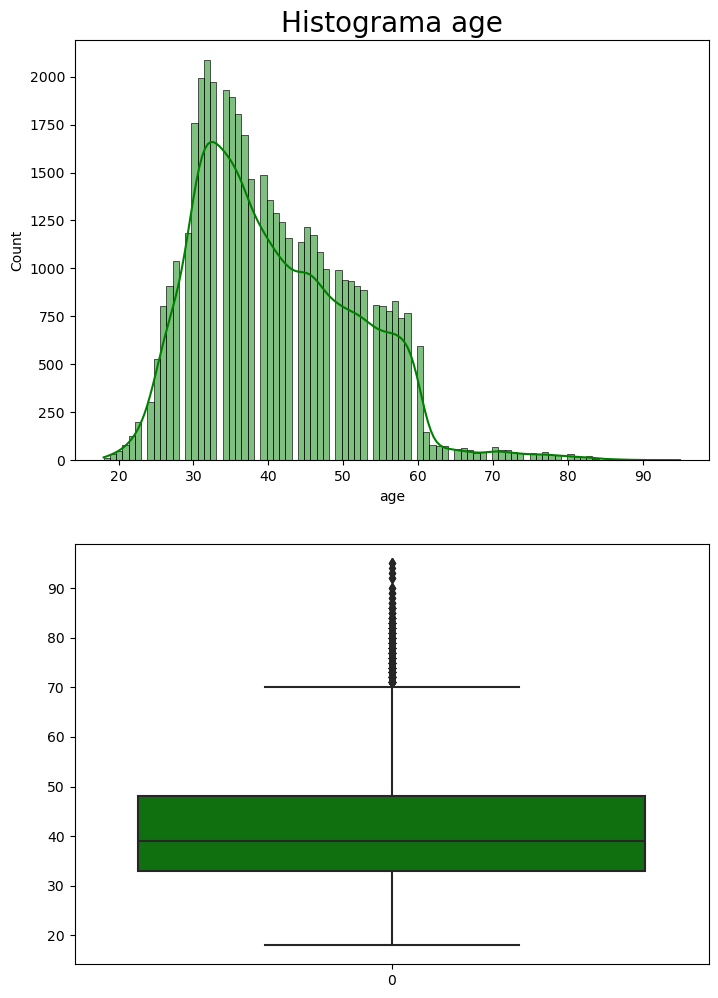

In [71]:
plt.figure(figsize = (18,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['age'], kde = True, color = "green")
plt.title('Histograma age', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['age'], color = "green")

plt.show()

In [72]:
# Trantando a varialvel age

df.age.mode()

0    32.0
Name: age, dtype: float64

In [73]:
fix_missing_value(df, 'age', 32)

20 valores ausentes na coluna age foram substituídos por 32.


0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    71.0
45208    72.0
45209    57.0
45210    37.0
Name: age, Length: 45211, dtype: float64

In [74]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 19 colunas.
Encontrado: 3 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
month,50,0.11,object
response,30,0.07,object
salary,26,0.06,float64


In [75]:
df['age'] = df['age'].astype("int64")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   salary     45185 non-null  float64
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   targeted   45211 non-null  object 
 5   default    45211 non-null  object 
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45211 non-null  object 
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  response   45181 non-null  object 
 17  job        45211 non-null  object 
 18  education  45211 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

In [77]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


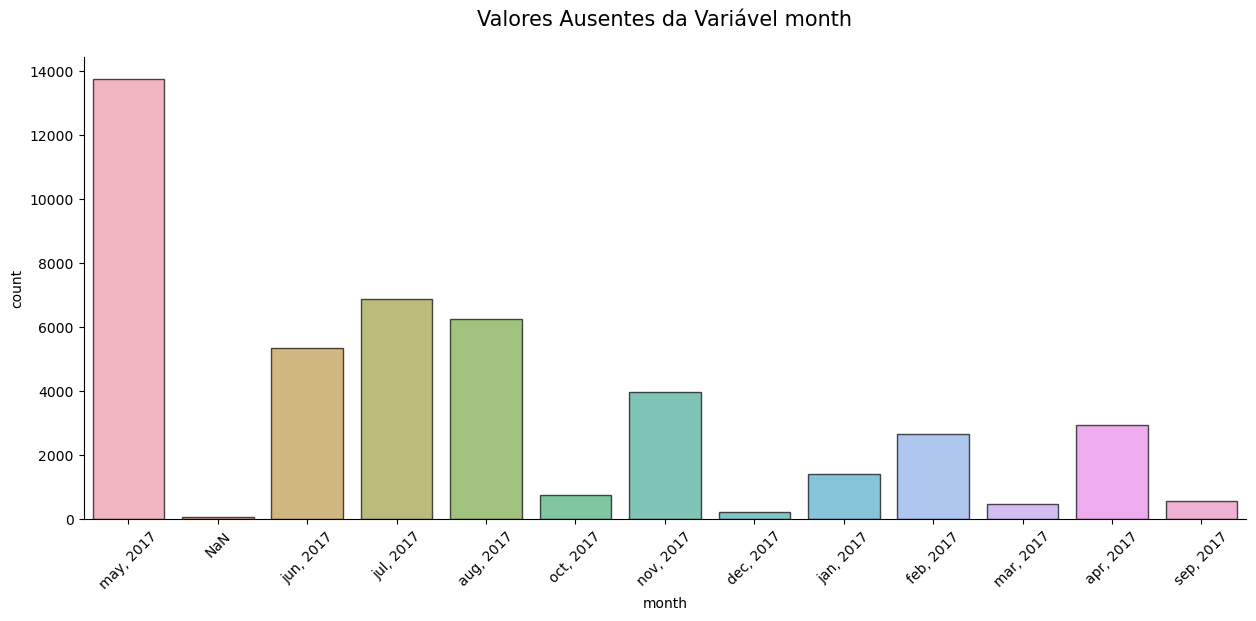

In [78]:
ax = plt.figure(figsize = (15,6))

sns.countplot(data = df.fillna('NaN'), x = 'month', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável month\n", fontsize = 15)
plt.show()

In [79]:
df.month.dtype

dtype('O')

In [80]:
df.month.value_counts()

month
may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: count, dtype: int64

In [81]:
df.month.mode()

0    may, 2017
Name: month, dtype: object

In [82]:
fix_missing_value(df, 'month', 'may, 2017')

50 valores ausentes na coluna month foram substituídos por may, 2017.


0        may, 2017
1        may, 2017
2        may, 2017
3        may, 2017
4        may, 2017
           ...    
45206    nov, 2017
45207    nov, 2017
45208    nov, 2017
45209    nov, 2017
45210    nov, 2017
Name: month, Length: 45211, dtype: object

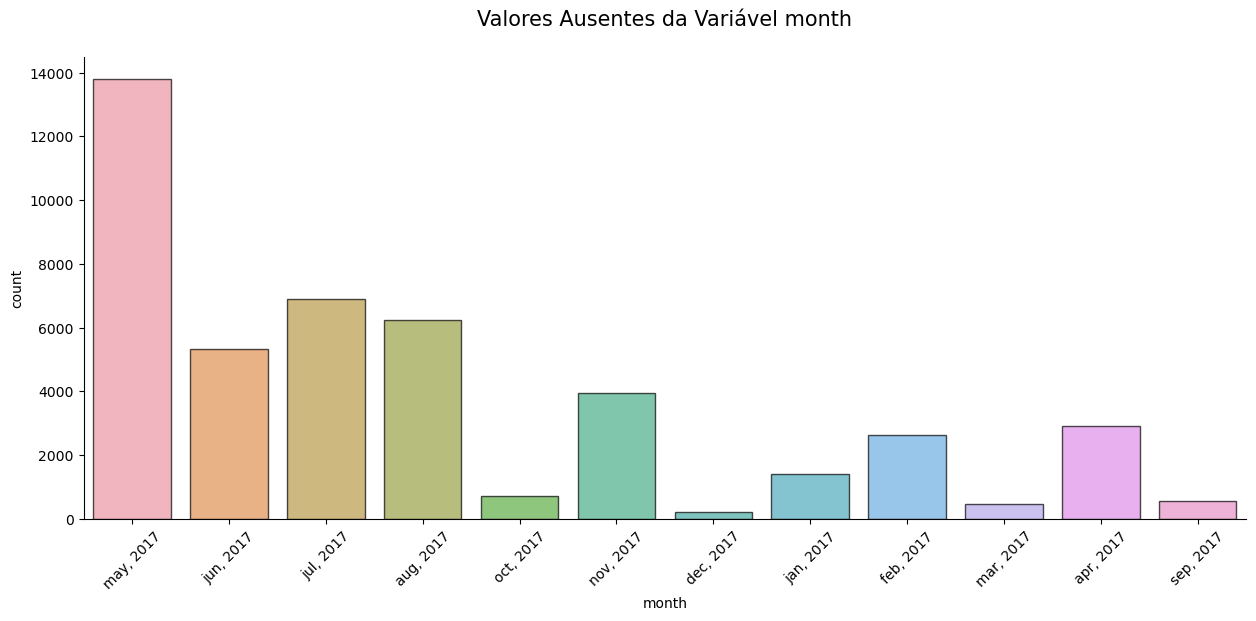

In [83]:
ax = plt.figure(figsize = (15,6))

sns.countplot(data = df.fillna('NaN'), x = 'month', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável month\n", fontsize = 15)
plt.show()

In [84]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 19 colunas.
Encontrado: 2 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
response,30,0.07,object
salary,26,0.06,float64


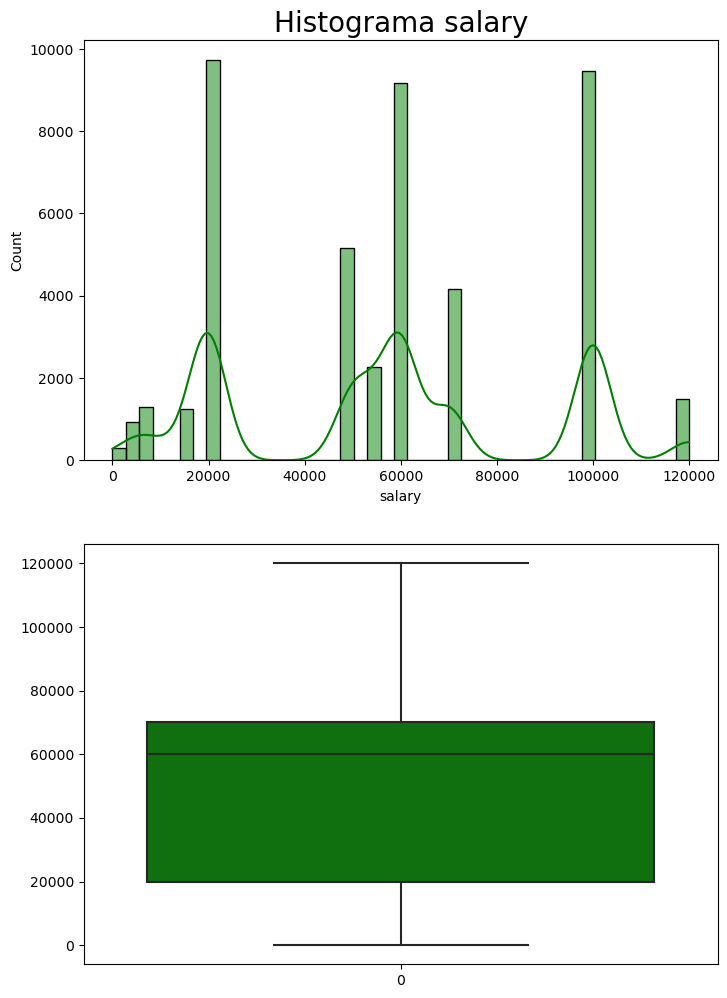

In [85]:
plt.figure(figsize = (18,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['salary'], kde = True, color = "green")
plt.title('Histograma salary', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['salary'], color = "green")

plt.show()

In [86]:
df.salary.median()

60000.0

In [87]:
df.salary.fillna(60000, inplace=True)

In [88]:
# Alem de Na tambem ha valores ausentes (0) na variavel slary

df.salary.value_counts()

salary
20000.0     9725
100000.0    9454
60000.0     9195
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: count, dtype: int64

In [89]:
df.salary.median()

60000.0

In [90]:
df.salary = df.salary.replace(0, 60000)

In [91]:
df.salary.value_counts()

salary
20000.0     9725
60000.0     9483
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
Name: count, dtype: int64

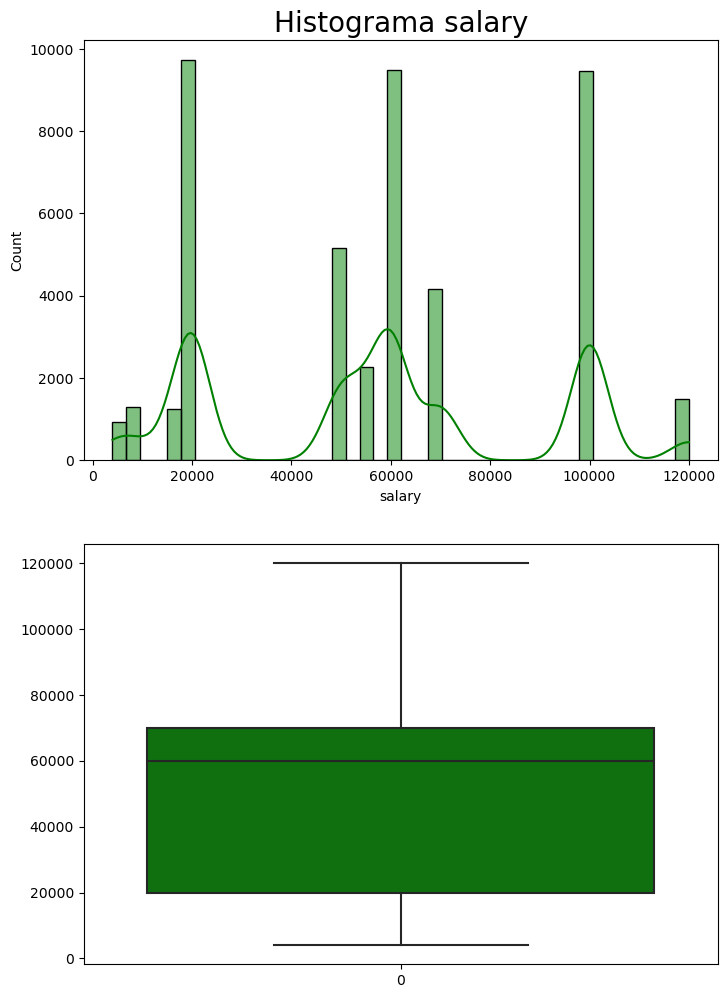

In [92]:
plt.figure(figsize = (18,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['salary'], kde = True, color = "green")
plt.title('Histograma salary', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['salary'], color = "green")

plt.show()

In [93]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 19 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
response,30,0.07,object


In [94]:
drop_rows_with_missing_values(df)

30 linhas contendo valores ausentes foram descartadas.


In [95]:
df.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,40.931808,57391.713331,1362.689936,15.807153,2.763352,40.198601,0.580355
std,10.618103,31754.374050,3045.584521,8.322919,3.096578,100.134050,2.303987
min,18.000000,4000.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [96]:
df.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [97]:
df.pdays.value_counts()

pdays
-1      36930
 182      167
 92       147
 91       126
 183      125
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [98]:
df.pdays = df.pdays.replace(-1, np.nan)

In [99]:
func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 19 colunas.
Encontrado: 1 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
pdays,36930,81.74,float64


In [100]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')

In [101]:
drop_columns(df, 'pdays')

5 colunas foram descartadas.


In [102]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'response', 'job', 'education'],
      dtype='object')

In [103]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown


In [104]:
df.shape

(45181, 18)

In [105]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [126]:
df.to_csv('/Users/duda/PythonDSA/Duda/5-Projeto4/dados/dataset_clean.csv')

In [117]:
df.groupby(by = ["education"])["salary"].mean()

education
primary      34697.106955
secondary    49922.420113
tertiary     83041.077340
unknown      50708.512931
Name: salary, dtype: float64

In [120]:
# Cria a variável response_flag como tipo numérico onde response "yes"= 1, "no"= 0

df["response_flag"] = np.where(df["response"] == "yes",1,0)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


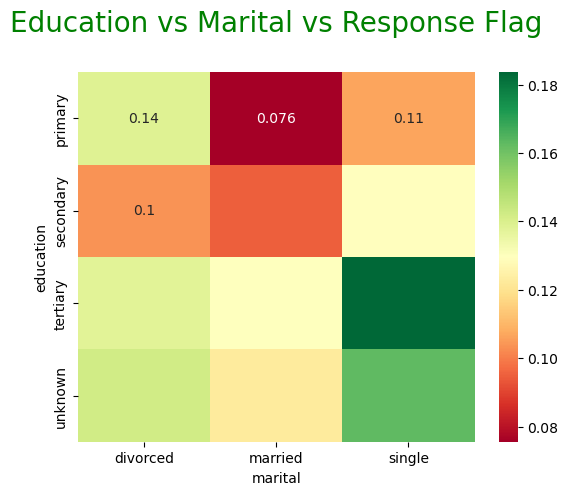

In [121]:
# Mapa de correlação

res1 = df.pivot_table(index = "education", columns = "marital", values = "response_flag", aggfunc = "mean")
sns.heatmap(res1, annot = True, cmap = "RdYlGn")
plt.title("Education vs Marital vs Response Flag\n", fontdict = {'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()
